In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
# from necro_uncal_new_updated import model as model100
from necro_uncal_new_10tnf import model as model10
# from necro_uncal_new_1tnf import model as model1
# from necro_uncal_new_01tnf import model as model01
import pandas as pd
# alias_model_components(model100, model10, model1, model01)
from scipy import stats
from pysb.simulator import SimulationResult
import seaborn as sns

In [2]:
print(list(model10.initial_conditions))

[(TNF(brec=None), Parameter('TNF_0', 233.0)), (TNFR(blig=None, brip=None, bDD=None), Parameter('TNFR_0', 4800.0)), (TRADD(brec=None, brip=None, state='unmod', bDD1=None, bDD2=None), Parameter('TRADD_0', 4696.0)), (RIP1(bscf=None, bub1=None, bub2=None, bub3=None, bDD=None, btraf=None, bRHIM=None, bMLKL=None, state='unmod'), Parameter('RIP1_0', 40000.0)), (TRAF(brip=None, bciap=None, bcyld=None, state='unmod'), Parameter('TRAF_0', 11776.0)), (cIAP(btraf=None), Parameter('cIAP_0', 9000.0)), (MLKL(bRHIM=None, state='unmod'), Parameter('MLKLa_0', 5544.0)), (A20(brip=None), Parameter('A20_0', 9000.0)), (CYLD(brip=None, btraf=None), Parameter('CYLD_0', 9000.0)), (FADD(bDD=None, bDED1=None, bDED2=None), Parameter('FADD_0', 3109.0)), (RIP3(bRHIM=None, bDD=None, state='unmod'), Parameter('RIP3_0', 10654.0)), (flip_L(bDED=None, state='A'), Parameter('flip_L_0', 3900.0)), (LUBAC(brip=None), Parameter('Lubac_0', 7226.0)), (C8(bf=None, flip=None, state='I'), Parameter('C8_0', 3799.0))]


In [ ]:
from necro_uncal_new_10tnf import model as model10
par_files = np.load('most_likely_par_10k_necropydream_may72020.npy')
n_pars = len(par_files)
all_pars = np.zeros((n_pars, len(model100.parameters)))

rate_params = model100.parameters_rules() # these are only the parameters involved in the rules
param_values = np.array([p.value for p in model100.parameters]) # these are all the parameters
rate_mask = np.array([p in rate_params for p in model100.parameters])

for i in range(n_pars):
    par = par_files[i]
    param_values[rate_mask] = 10 ** par
    all_pars[i] = param_values
print(len(all_pars))

In [3]:
par_files = np.load('most_likely_par_10k_necropydream_may72020.npy')
n_pars = len(par_files)
all_pars2 = np.zeros((n_pars, len(model10.parameters)))

rate_params = model10.parameters_rules() # these are only the parameters involved in the rules
param_values = np.array([p.value for p in model10.parameters]) # these are all the parameters
rate_mask = np.array([p in rate_params for p in model10.parameters])

for i in range(n_pars):
    par = par_files[i]
    param_values[rate_mask] = 10 ** par
    all_pars2[i] = param_values
print(len(all_pars2)) 

10000


In [19]:
clus0_10 = np.load('necro_pars10k_cluster0_5720.npy')
clus1_10 = np.load('necro_pars10k_cluster1_5720.npy')
clus2_10 = np.load('necro_pars10k_cluster2_5720.npy')
clus3_10 = np.load('necro_pars10k_cluster3_5720.npy')

In [5]:
print(len(clus0_10))
# print(len(clus1_10))
# print(len(clus2_10))
# print(len(clus3_10))

3644


In [ ]:
tspan = np.linspace(0, 1440, 300)
solver100 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
result100 = solver100.run(param_values=all_pars, num_processors = 10)

In [6]:
tspan = np.linspace(0, 1440, 300)
solver10 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
result10 = solver10.run(param_values=all_pars2, num_processors = 10)

2020-05-19 20:06:04.003 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-19 20:06:04.516 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-19 20:06:04.641 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started
2020-05-19 20:06:05.433 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 10 processes
2020-05-19 20:07:40.547 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-19 20:07:40.548 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-19 20:07:43.720 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


In [14]:
m = model10.components 

In [16]:
tspan = np.linspace(0, 1440, 300)
solver10n = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
result10n = solver10n.run(initials= {m.TNF(brec=None):233}, param_values=clus0_10, num_processors = 10)

2020-05-19 20:15:46.505 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-19 20:15:46.509 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-19 20:15:46.540 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started
2020-05-19 20:15:46.846 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 10 processes
2020-05-19 20:16:30.705 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-19 20:16:30.706 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-19 20:16:31.826 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


In [17]:
df3 = result10.dataframe
df4 = result10n.dataframe

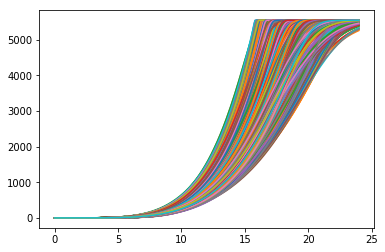

In [11]:
plt.figure()
for i in range(len(all_pars2)):
    plt.plot(tspan/60, df3.loc[i]['MLKLa_obs'].iloc[:])
plt.show() 

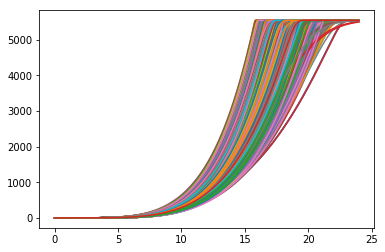

In [18]:
plt.figure()
for i in range(len(clus0_10)):
    plt.plot(tspan/60, df4.loc[i]['MLKLa_obs'].iloc[:])
plt.show() 

In [ ]:
#FOR PLOTTING PERCENTILES 
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([result10.dataframe],
               keys=['wt'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour, alpha = 1.0)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)
# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Flip vs C8 KO Cluster 0 with 10ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
plt.ylim(ymin = 1e-3)
# fig.savefig("necro_10k_5720_clus0med_100tnf_quant.pdf")
plt.errorbar(x101/60, y101*5544,
             yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
                    0.050022163974868*5544),
             (400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x102/60, y102*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# custom_lines = [Line2D([0], [0], color='blue', lw=4),
#                 Line2D([0], [0], color='red', lw=4),
#                 Line2D([0], [0], color='orange', lw=4),
#                 Line2D([0], [0], color='black', lw=4)]
# plt.legend(custom_lines, ['WT', 'FlipKO', 'C8KO', 'Data'], prop={'size': 10}, loc = 'best')
plt.show()

In [20]:
m1 = model10.components 

# 100 TNF CLUSTER 0 DYNAMICS

In [22]:
print('running simulations cluster 0 10 TNF')
tspan = np.linspace(0, 1440, 300)
solverwt0 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(initials = {m.TNF(brec=None):233},param_values=clus0_10, num_processors = 10)
# sim0.save('pydyno_s36prod_5k_5620_100tnf_cluster0pars_wt.h5',include_obs_exprs = True)
# wt100_0 = sim0.dataframe

2020-05-19 20:20:18.284 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-19 20:20:18.289 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-19 20:20:18.319 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started


running simulations cluster 0 10 TNF


2020-05-19 20:20:18.615 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 10 processes
2020-05-19 20:21:02.396 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-19 20:21:02.397 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-19 20:21:03.542 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


In [23]:
print('running simulations cluster 0 A20 KO')
tspan = np.linspace(0, 1440, 300)
solverflip0 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
flipclus0 = solverflip0.run(initials = {m1.flip_L(bDED=None, state = 'A'):0.0, m1.TNF(brec=None):233},
                         param_values=clus0_10, num_processors = 10)
# a20clus0.save('pydyno_s36prod_5k_5620_100tnf_cluster0pars_a20ko.h5',include_obs_exprs = True)
# df0_100 = a20clus0.dataframe

2020-05-19 20:21:03.550 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-19 20:21:03.555 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-19 20:21:03.587 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started


running simulations cluster 0 A20 KO


2020-05-19 20:21:03.875 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 10 processes
2020-05-19 20:21:41.729 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-19 20:21:41.730 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-19 20:21:42.868 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


In [24]:
print('running simulations cluster 0 CYLD KO')
tspan = np.linspace(0, 1440, 300)
solverc80 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
c8clus0 = solverc80.run(initials = {m1.C8(bf=None, flip = None, state='I'):0.0,m1.TNF(brec=None):233},
                         param_values=clus0_10, num_processors = 10)
# simclus000.save('pydyno_s36prod_5k_5620_100tnf_cluster0pars_cyldko.h5',include_obs_exprs = True)
# c0_100_cyldko = simclus000.dataframe

2020-05-19 20:21:42.877 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-19 20:21:42.881 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-19 20:21:42.913 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started


running simulations cluster 0 CYLD KO


2020-05-19 20:21:43.201 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 10 processes
2020-05-19 20:22:21.440 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-19 20:22:21.441 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-19 20:22:22.611 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


In [ ]:
df1 = flipclus0.dataframe
df2 = c8clus0.dataframe
df3 = result10.dataframe

In [25]:
plt.figure()
for i in range(len(clus0_10)):
    plt.plot(tspan/60, df1.loc[i]['MLKLa_obs'].iloc[:])
plt.show()    

NameError: name 'df1' is not defined

<Figure size 432x288 with 0 Axes>

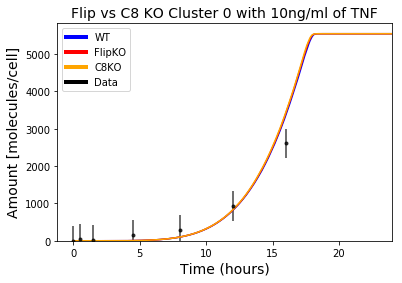

In [53]:
#FOR PLOTTING PERCENTILES 
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([wtclus0.dataframe, flipclus0.dataframe, c8clus0.dataframe],
               keys=['wt', 'flipko', 'c8ko'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue',
    ('MLKLa_obs', 'flipko'): 'red',
    ('MLKLa_obs', 'c8ko'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour, alpha = 1.0)
    # Plot the 10% and 90% quantiles as an envelope
#     ax.fill_between(time_hrs,
#                     quantile_data.loc[:, lower_quantile],
#                     quantile_data.loc[:, upper_quantile],
#                     color=colour,
#                     alpha=.1)
# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Flip vs C8 KO Cluster 0 with 10ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
plt.ylim(ymin = 1e-3)
fig.savefig('necro_10k_5720_clus0medC8Flip_10tnf.pdf')
plt.errorbar(x101/60, y101*5544,
             yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
                    0.050022163974868*5544),
             (400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x102/60, y102*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='black', lw=4)]
plt.legend(custom_lines, ['WT', 'FlipKO', 'C8KO', 'Data'], prop={'size': 10}, loc = 'best')
plt.show()

# 10 TNF CLUSTER 1 DYNAMICS

In [28]:
print('running simulations cluster 1 100 TNF')
tspan = np.linspace(0, 1440, 300)
solverwt1 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
wtclus1 = solverwt1.run(initials = {m1.TNF(brec=None):233}, param_values=clus1_10, num_processors = 10)
# sim1.save('pydyno_s36prod_5k_5620_100tnf_cluster1pars_wt.h5',include_obs_exprs = True)
# wt100_1 = sim1.dataframe

2020-05-19 20:23:30.687 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-19 20:23:30.691 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-19 20:23:30.722 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started
2020-05-19 20:23:30.859 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 10 processes


running simulations cluster 1 100 TNF


2020-05-19 20:23:44.774 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-19 20:23:44.775 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-19 20:23:45.261 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


In [29]:
print('running simulations cluster 1 100 TNF')
tspan = np.linspace(0, 1440, 300)
solverflip1 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
flipclus1 = solverflip1.run(initials = {m.flip_L(bDED=None, state = 'A'):0, m1.TNF(brec=None):233},
                         param_values=clus1_10, num_processors = 12)
# a20clus1.save('pydyno_s36prod_5k_5620_100tnf_cluster1pars_a20ko.h5',include_obs_exprs = True)
# df1_100 = a20clus1.dataframe

2020-05-19 20:23:45.268 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-19 20:23:45.273 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-19 20:23:45.304 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started
2020-05-19 20:23:45.439 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 12 processes


running simulations cluster 1 100 TNF


2020-05-19 20:23:56.634 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-19 20:23:56.635 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-19 20:23:57.129 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


In [31]:
print('running simulations cluster 1 WT')
tspan = np.linspace(0, 1440, 300)
solverc81 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
c8clus1 = solverc81.run(initials = {m.C8(bf=None, flip = None, state='I'):0, m1.TNF(brec=None):233},
                         param_values=clus1_10, num_processors = 12)
# simclus111.save('pydyno_s36prod_5k_5620_100tnf_cluster1pars_cyldko.h5',include_obs_exprs = True)
# c1_100_cyldko= simclus111.dataframe

2020-05-19 20:24:17.819 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-19 20:24:17.824 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-19 20:24:17.855 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started
2020-05-19 20:24:17.991 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 12 processes


running simulations cluster 1 WT


2020-05-19 20:24:29.144 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-19 20:24:29.145 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-19 20:24:29.628 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


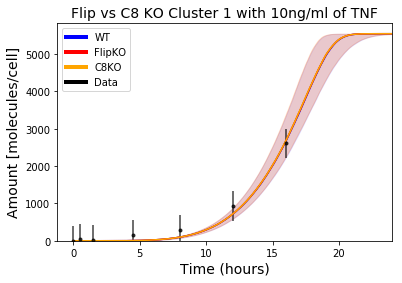

In [51]:
#FOR PLOTTING PERCENTILES 
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([wtclus1.dataframe, flipclus1.dataframe, c8clus1.dataframe],
               keys=['wt', 'flipko', 'c8ko'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue',
    ('MLKLa_obs', 'flipko'): 'red',
    ('MLKLa_obs', 'c8ko'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour, alpha = 1.0)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)
# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Flip vs C8 KO Cluster 1 with 10ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
plt.ylim(ymin = 1e-3)
fig.savefig('necro_10k_5720_clus1medC8Flip_10tnf_quant.pdf')
plt.errorbar(x101/60, y101*5544,
             yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
                    0.050022163974868*5544),
             (400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x102/60, y102*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='black', lw=4)]
plt.legend(custom_lines, ['WT', 'FlipKO', 'C8KO', 'Data'], prop={'size': 10}, loc = 'best')
plt.show()

# 10 TNF CLUSTER 2 DYNAMICS

In [33]:
print('running simulations cluster 2 100 TNF')
tspan = np.linspace(0, 1440, 300)
solverwt2 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
wtclus2 = solverwt2.run(initials = {m1.TNF(brec=None):233}, param_values=clus2_10, num_processors = 12)
# sim2.save('pydyno_s36prod_5k_5620_100tnf_cluster2pars_wt.h5',include_obs_exprs = True)
# wt100_2 = sim2.dataframe

2020-05-19 20:27:36.487 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-19 20:27:36.493 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-19 20:27:36.525 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started


running simulations cluster 2 100 TNF


2020-05-19 20:27:36.707 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 12 processes
2020-05-19 20:27:55.388 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-19 20:27:55.388 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-19 20:27:56.034 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


In [34]:
print('running simulations cluster 2 100 TNF')
tspan = np.linspace(0, 1440, 300)
solverflip2 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
flipclus2 = solverflip2.run(initials = {m.flip_L(bDED=None, state = 'A'):0,m1.TNF(brec=None):233},
                         param_values=clus2_10, num_processors = 12)
# simclus2.save('pydyno_s36prod_5k_5620_100tnf_cluster2pars_a20ko.h5',include_obs_exprs = True)
# df2_100 = simclus2.dataframe

2020-05-19 20:27:56.041 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-19 20:27:56.045 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-19 20:27:56.077 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started


running simulations cluster 2 100 TNF


2020-05-19 20:27:56.255 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 12 processes
2020-05-19 20:28:11.402 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-19 20:28:11.403 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-19 20:28:12.048 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


In [35]:
print('running simulations cluster 2 100 TNF')
tspan = np.linspace(0, 1440, 300)
solverc82 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
c8clus2 = solverc82.run(initials = {m.C8(bf=None, flip = None, state='I'):0,m1.TNF(brec=None):233},
                         param_values=clus2_10, num_processors = 12)
# simclus222.save('pydyno_s36prod_5k_5620_100tnf_cluster2pars_clydko.h5',include_obs_exprs = True)
# c2_100_cyldko = simclus222.dataframe

2020-05-19 20:28:12.056 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-19 20:28:12.061 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-19 20:28:12.092 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started


running simulations cluster 2 100 TNF


2020-05-19 20:28:12.268 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 12 processes
2020-05-19 20:28:27.530 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-19 20:28:27.531 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-19 20:28:28.172 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


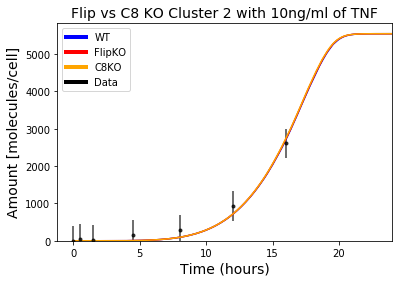

In [47]:
#FOR PLOTTING PERCENTILES 
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([wtclus2.dataframe, flipclus2.dataframe, c8clus2.dataframe],
               keys=['wt', 'flipko', 'c8ko'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue',
    ('MLKLa_obs', 'flipko'): 'red',
    ('MLKLa_obs', 'c8ko'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour, alpha = 1.0)
    # Plot the 10% and 90% quantiles as an envelope
#     ax.fill_between(time_hrs,
#                     quantile_data.loc[:, lower_quantile],
#                     quantile_data.loc[:, upper_quantile],
#                     color=colour,
#                     alpha=.1)
# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Flip vs C8 KO Cluster 2 with 10ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
plt.ylim(ymin = 1e-3)
fig.savefig('necro_10k_5720_clus2medC8Flip_10tnf.pdf')
plt.errorbar(x101/60, y101*5544,
             yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
                    0.050022163974868*5544),
             (400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x102/60, y102*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='black', lw=4)]
plt.legend(custom_lines, ['WT', 'FlipKO', 'C8KO', 'Data'], prop={'size': 10}, loc = 'best')
plt.show()

# 10 TNF CLUSTER 3 DYNAMICS

In [37]:
print('running simulations cluster 2 100 TNF')
tspan = np.linspace(0, 1440, 300)
solverwt3 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
wtclus3 = solverwt3.run(initials = {m1.TNF(brec=None):233},param_values=clus3_10, num_processors = 12)
# sim2.save('pydyno_s36prod_5k_5620_100tnf_cluster2pars_wt.h5',include_obs_exprs = True)
# wt100_2 = sim2.dataframe

2020-05-19 20:29:04.803 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-19 20:29:04.809 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-19 20:29:04.840 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started


running simulations cluster 2 100 TNF


2020-05-19 20:29:05.082 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 12 processes
2020-05-19 20:29:30.345 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-19 20:29:30.345 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-19 20:29:31.232 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


In [38]:
print('running simulations cluster 3 100 TNF')
tspan = np.linspace(0, 1440, 300)
solverflip3 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
flipclus3 = solverflip3.run(initials = {m.flip_L(bDED=None, state = 'A'):0,m1.TNF(brec=None):233},
                         param_values=clus3_10, num_processors = 12)

2020-05-19 20:29:31.241 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-19 20:29:31.245 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-19 20:29:31.276 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started


running simulations cluster 3 100 TNF


2020-05-19 20:29:31.506 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 12 processes
2020-05-19 20:29:50.600 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-19 20:29:50.601 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-19 20:29:51.487 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


In [39]:
print('running simulations cluster 2 100 TNF')
tspan = np.linspace(0, 1440, 300)
solverc83 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
c8clus3 = solverc83.run(initials = {m.C8(bf=None, flip = None, state='I'):0,m1.TNF(brec=None):233},
                         param_values=clus3_10, num_processors = 12)
# simclus222.save('pydyno_s36prod_5k_5620_100tnf_cluster2pars_clydko.h5',include_obs_exprs = True)
# c2_100_cyldko = simclus222.dataframe

2020-05-19 20:29:51.495 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-19 20:29:51.499 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-19 20:29:51.530 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started


running simulations cluster 2 100 TNF


2020-05-19 20:29:51.759 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 12 processes
2020-05-19 20:30:10.815 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-19 20:30:10.816 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-19 20:30:11.831 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


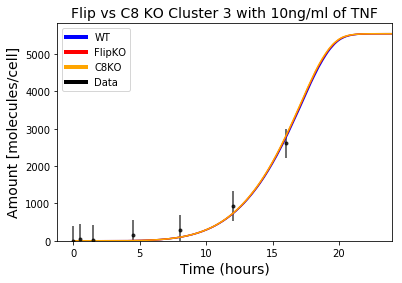

In [43]:
#FOR PLOTTING PERCENTILES 
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([wtclus3.dataframe, flipclus3.dataframe, c8clus3.dataframe],
               keys=['wt', 'flipko', 'c8ko'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue',
    ('MLKLa_obs', 'flipko'): 'red',
    ('MLKLa_obs', 'c8ko'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour, alpha = 1.0)
    # Plot the 10% and 90% quantiles as an envelope
#     ax.fill_between(time_hrs,
#                     quantile_data.loc[:, lower_quantile],
#                     quantile_data.loc[:, upper_quantile],
#                     color=colour,
#                     alpha=.1)
# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Flip vs C8 KO Cluster 3 with 10ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
plt.ylim(ymin = 1e-3)
fig.savefig("necro_10k_5720_clus3medC8Flip_10tnf.pdf")
plt.errorbar(x101/60, y101*5544,
             yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
                    0.050022163974868*5544),
             (400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x102/60, y102*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='black', lw=4)]
plt.legend(custom_lines, ['WT', 'FlipKO', 'C8KO', 'Data'], prop={'size': 10}, loc = 'best')
plt.show()

In [ ]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([result100.dataframe, result10.dataframe],
               keys=['mlkl100', 'mlkl10'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'mlkl100'): 'blue',
    ('MLKLa_obs', 'mlkl10'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Model Fitting for 100 & 10 ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs_norm.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
plt.errorbar(x1001/60, y1001*5544,
             yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
             (400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x101/60, y101*5544,
             yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
                    0.050022163974868*5544),
             (400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x102/60, y102*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='black', lw=4)]
plt.legend(custom_lines, ['100 ng/ml', '10 ng/ml', 'Data'], prop={'size': 10}, loc = 'best')
plt.show()

# Percentiles for 100 TNF vs A20 KO in Clus 0,1,2

In [ ]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([wtclus0.dataframe, a20clus0.dataframe, cyldclus0.dataframe],
               keys=['wt', 'a20ko', 'cyldko'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue',
    ('MLKLa_obs', 'a20ko'): 'red',
    ('MLKLa_obs', 'cyldko'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour, alpha = 1.0)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('A20 vs CYLD KO Cluster 0 with 100ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
plt.errorbar(x1001/60, y1001*5544,
             yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
             (400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x101/60, y101*5544,
#              yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
#                     0.050022163974868*5544),
#              (400,400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x102/60, y102*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, ['wt', 'a20ko', 'cyldko'], prop={'size': 10}, loc = 'best')
plt.show()

In [ ]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([wtclus1.dataframe, a20clus1.dataframe, cyldclus1.dataframe],
               keys=['wt', 'a20ko', 'cyldko'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue',
    ('MLKLa_obs', 'a20ko'): 'red',
    ('MLKLa_obs', 'cyldko'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour, alpha = 1.0)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('A20 vs CYLD KO Cluster 0 with 100ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
plt.errorbar(x1001/60, y1001*5544,
             yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
             (400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x101/60, y101*5544,
#              yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
#                     0.050022163974868*5544),
#              (400,400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x102/60, y102*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, ['wt', 'a20ko', 'cyldko'], prop={'size': 10}, loc = 'best')
plt.show()

In [ ]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([wtclus2.dataframe, a20clus2.dataframe, cyldclus2.dataframe],
               keys=['wt', 'a20ko', 'cyldko'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue',
    ('MLKLa_obs', 'a20ko'): 'red',
    ('MLKLa_obs', 'cyldko'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour, alpha = 1.0)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('A20 vs CYLD KO Cluster 0 with 100ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
plt.errorbar(x1001/60, y1001*5544,
             yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
             (400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x101/60, y101*5544,
#              yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
#                     0.050022163974868*5544),
#              (400,400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x102/60, y102*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, ['wt', 'a20ko', 'cyldko'], prop={'size': 10}, loc = 'best')
plt.show()